In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
vendasglobais = pd.read_csv('Dados/VendasGlobais.csv')
vendasglobais = vendasglobais.dropna(axis=0, how='all')
len(vendasglobais.axes[0])

2172

In [3]:
pd.DataFrame(vendasglobais.dtypes)

,0
PedidoID,float64
CategoriaID,float64
CategoriaNome,object
CategoriaDescrição,object
ClienteID,float64
ClienteNome,object
ClienteContato,object
ClienteCidade,object
ClientePaísID,object
ClientePaís,object


In [4]:
vendasglobais['Vendas Custo'].head(10)

0     417.5107
1      63.8885
2     961.5917
3    1354.1170
4    4810.2163
5    5985.2808
6     121.7160
7     298.4112
8    1005.8544
9     113.2488
Name: Vendas Custo, dtype: float64

In [5]:
vendasglobais['Margem Bruta'].head(10)

0      86.7293
1      17.1295
2     346.6963
3     488.2190
4     999.2237
5    3050.4692
6      43.8840
7     152.0888
8     208.9456
9      40.8312
Name: Margem Bruta, dtype: float64

In [6]:
vendasglobais['Vendas'].head(10)

0     504.240
1      81.018
2    1308.288
3    1842.336
4    5809.440
5    9035.750
6     165.600
7     450.500
8    1214.800
9     154.080
Name: Vendas, dtype: float64

In [7]:
vendasglobais['Desconto'].head(10)

0       0.000
1       3.858
2     218.048
3     307.056
4       0.000
5    1807.150
6      27.600
7      90.100
8       0.000
9      25.680
Name: Desconto, dtype: float64

In [8]:
vendasglobais['Frete'].head(10)

0    64.69
1    53.28
2    30.97
3    76.90
4    64.69
5    23.12
6    30.97
7    23.12
8    64.69
9    76.90
Name: Frete, dtype: float64

In [9]:
vendedores = pd.read_csv('Dados/Vendedores.csv')

In [10]:
fornecedores = pd.read_csv('Dados/Fornecedores.csv')

In [11]:
transportadoras = pd.read_csv('Dados/Transportadoras.csv')

In [12]:
planilha_total = pd.merge(vendasglobais, vendedores, on='VendedorID')
planilha_total = pd.merge(planilha_total, fornecedores, on='FornecedorID')
planilha_total = pd.merge(planilha_total, transportadoras, on='TransportadoraID')

planilha_total.head()

,PedidoID,CategoriaID,CategoriaNome,CategoriaDescrição,ClienteID,ClienteNome,ClienteContato,ClienteCidade,ClientePaísID,ClientePaís,...,Qtde,Data,VendedorID,ProdutoID,ProdutoNome,TransportadoraID,FornecedorID,VendedorNome,FornecedorNome,TransportadoraNome
0,10413.0,1.0,Men´s Clothes,Fashion for Men,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,...,24.0,20/10/2010,5.0,1.0,Lenin Jeansshorts,1.0,1.0,Stefanos Tsitsipas,USA Jeans,General Shipping
1,10500.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,...,12.0,14/04/2011,5.0,15.0,Sumi Underwear,1.0,6.0,Stefanos Tsitsipas,Surf Trip,General Shipping
2,10832.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,...,16.0,19/11/2011,5.0,44.0,Okkaba Skin Jackets,1.0,20.0,Stefanos Tsitsipas,Wills Surfwear,General Shipping
3,10923.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,...,24.0,05/06/2012,4.0,67.0,X-Dress,1.0,16.0,Patrick Mcenroe,L.A. Sports,General Shipping
4,10413.0,2.0,Womens wear,Fashion for Women,41.0,Elle Fashion & Design,Louise Davu,Toulouse,FRA,France,...,14.0,20/10/2010,5.0,76.0,Minnki Pälsii,1.0,23.0,Stefanos Tsitsipas,Pälsii Sports,General Shipping


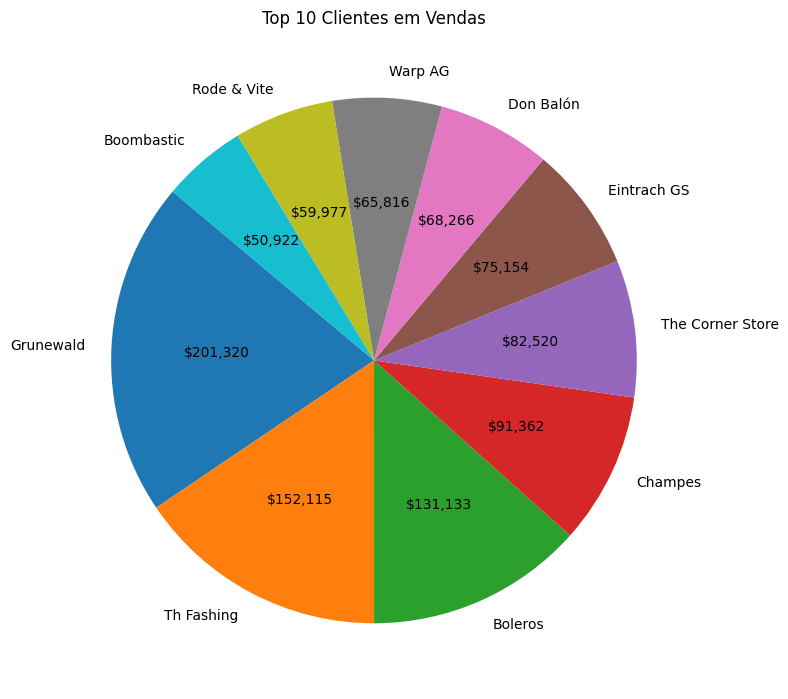

In [13]:
#1. Quem são os meus 10 maiores clientes em termos de vendas? 
import numpy as np


vendasCliente = planilha_total.groupby('ClienteNome')['Vendas'].sum()

clientes = vendasCliente.sort_values(ascending=False).head(10)
def absolute_value(val): 
    a = np.round(val/100.*clientes.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(8,8))

plt.pie(clientes, labels=clientes.index, autopct=absolute_value, startangle=140)
plt.title('Top 10 Clientes em Vendas')

plt.tight_layout()
plt.show()


ClientePaís
Germany    519553.7336
USA        186313.2205
France     175565.3015
Name: Vendas, dtype: float64


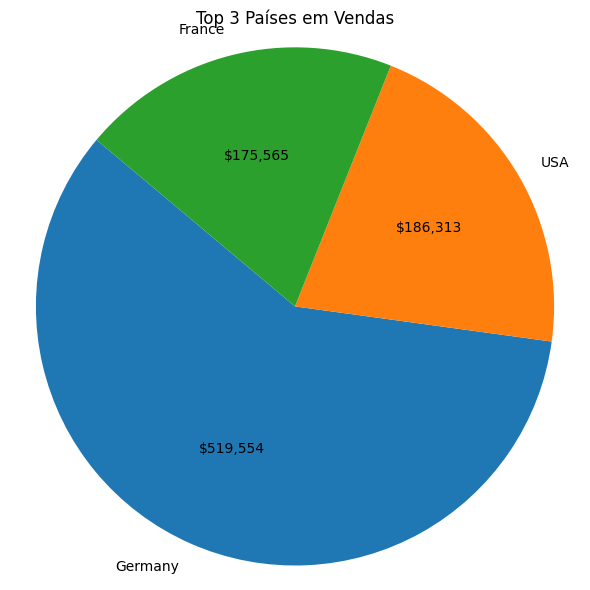

In [14]:
#2. Quais os três maiores países, em termos de vendas ($)?

import numpy as np


vendasCliente = planilha_total.groupby('ClientePaís')['Vendas'].sum()

clientes = vendasCliente.sort_values(ascending=False).head(3)
print(clientes)
#função que passa os valores de cada cliente para o grafico no lugar de autopct
def absolute_value(val): 
    a = np.round(val/100.*clientes.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,6))

plt.pie(clientes, labels=clientes.index, autopct=absolute_value, startangle=140)

plt.axis('equal')
plt.title('Top 3 Países em Vendas')
plt.tight_layout()
plt.show()

CategoriaNome
Womens wear        60941.7265
Sportwear          19509.4255
Babywear           10367.2100
Men´s Footwear      9467.7425
Ladies´Footwear     7798.5190
Name: Vendas, dtype: float64


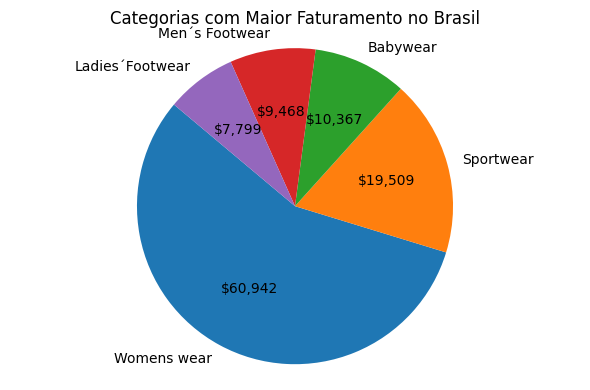

In [15]:
#3.Quais as categorias de produtos que geram maior faturamento (Vendas) no Brasil?

brasilSales = planilha_total[planilha_total['ClientePaís'] == 'Brazil']
revenueCategories = brasilSales.groupby('CategoriaNome')['Vendas'].sum()
highestCategoryRevenue = revenueCategories.sort_values(ascending=False).head(5)
print(highestCategoryRevenue)

def absolute_value(val): 
    a = np.round(val/100.*highestCategoryRevenue.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,4))
plt.pie(highestCategoryRevenue, labels=highestCategoryRevenue.index, autopct=absolute_value, startangle=140)
plt.axis('equal')
plt.title('Categorias com Maior Faturamento no Brasil')
plt.tight_layout()
plt.show()


In [16]:
#4. Qual a despesa com frete envolvendo cada transportadora?

transportadorasFrete = planilha_total.groupby('TransportadoraNome')['Frete'].sum()

print(transportadorasFrete)

TransportadoraNome
General Shipping    19843.83
Global Express      70897.82
Great Logistics     18771.69
Name: Frete, dtype: float64


ClienteNome
Grunewald      20488.4850
Gluderstedt    11923.3485
Boombastic     11235.9700
Eintrach GS    10377.8330
Warp AG         9085.7650
Name: Vendas, dtype: float64


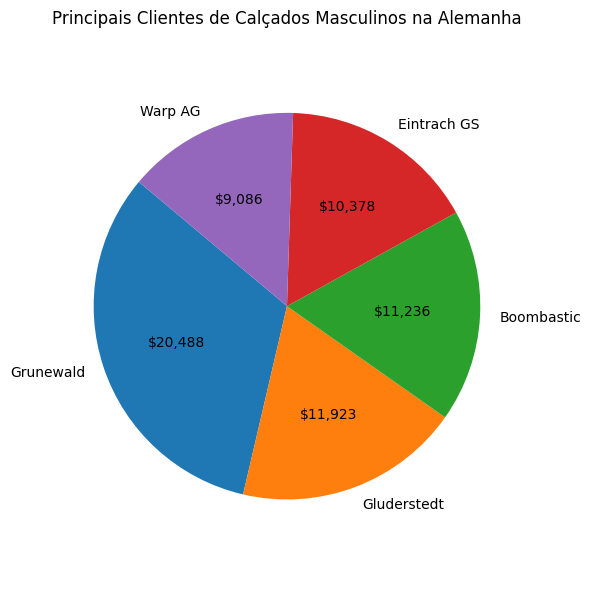

In [17]:
#5. Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos”(Men ́s Footwear) na Alemanha?

germanSales = planilha_total[planilha_total['ClientePaís'] == 'Germany']
germanSalesByCategory = germanSales[germanSales['CategoriaNome'] == 'Men´s Footwear']
germanSalesByCategory = germanSalesByCategory.groupby('ClienteNome')['Vendas'].sum()
topGermanCustomers = germanSalesByCategory.sort_values(ascending=False).head(5)
print(topGermanCustomers)

def absolute_value(val): 
    a = np.round(val/100.*topGermanCustomers.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,6))
plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct=absolute_value, startangle=140)


plt.axis('equal')
plt.title('Principais Clientes de Calçados Masculinos na Alemanha')
plt.tight_layout()
plt.show()

VendedorNome
Gael Monfils      7415.1295
Yannick Sinner    1160.0540
Martina Hingis     733.7770
Cori Gauff         404.5500
Name: Desconto, dtype: float64


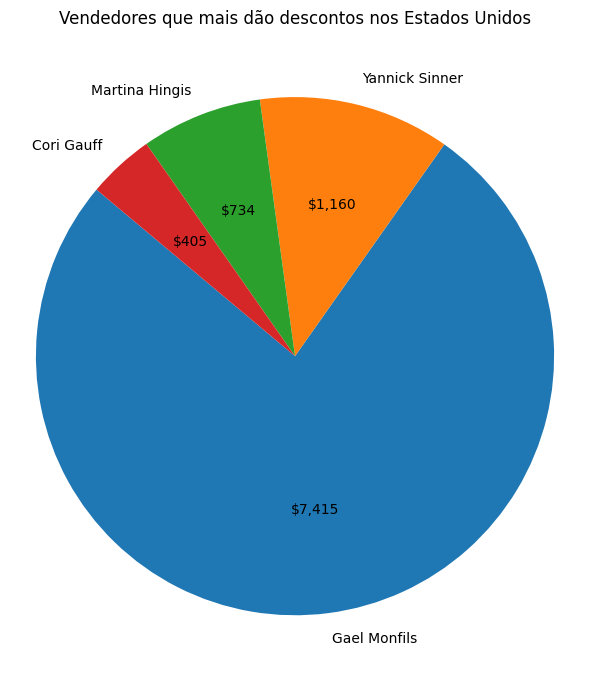

In [18]:
# 6. Quais os vendedores que mais dão descontos nos Estados Unidos?

usaSales = planilha_total[planilha_total['ClientePaís'] == 'USA']
usaSellerByMoreDiscount = usaSales.groupby('VendedorNome')['Desconto'].sum()
usaSellerByMoreDiscountOrder = usaSellerByMoreDiscount.sort_values(ascending=False).head(5)
print(usaSellerByMoreDiscountOrder)

def absolute_value(val): 
    a = np.round(val/100.*usaSellerByMoreDiscountOrder.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,7))
plt.pie(usaSellerByMoreDiscountOrder, labels=usaSellerByMoreDiscountOrder.index, autopct=absolute_value, startangle=140)
plt.axis('equal')
plt.title('Vendedores que mais dão descontos nos Estados Unidos')
plt.tight_layout()
plt.show()


FornecedorNome
Pälsii Sports     81839.9408
Baby Dress        20675.2166
Wills Surfwear    10019.1193
Great Outdoors     9165.0332
Global Outlet      4884.9949
Name: Margem Bruta, dtype: float64


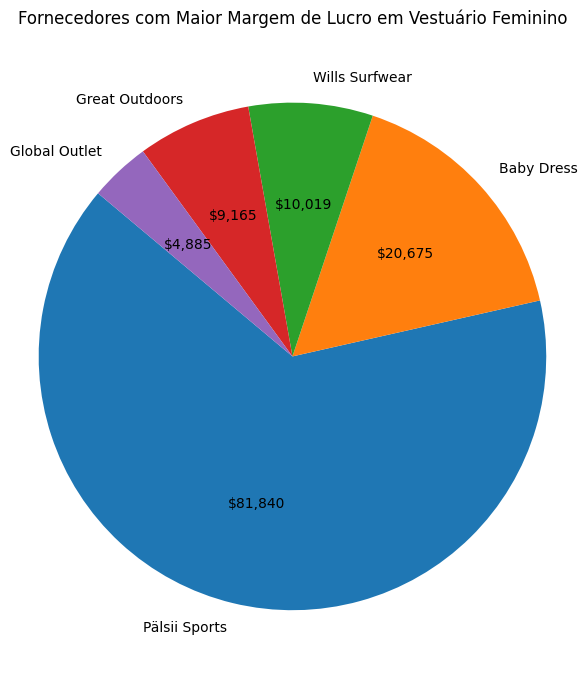

In [19]:
#7. Quais os fornecedores que dão a maior margem de lucro ($) no segmento de “Vestuário Feminino” (Womens wear)?

womensWear = planilha_total[planilha_total['CategoriaNome'] == 'Womens wear']
womensWearBySupplier = womensWear.groupby('FornecedorNome')['Margem Bruta'].sum()
highestMarginSuppliers = womensWearBySupplier.sort_values(ascending=False).head(5)
print(highestMarginSuppliers)

def absolute_value(val): 
    a = np.round(val/100.*highestMarginSuppliers.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,7))
plt.pie(highestMarginSuppliers, labels=highestMarginSuppliers.index, autopct=absolute_value, startangle=140)
plt.axis('equal')
plt.title('Fornecedores com Maior Margem de Lucro em Vestuário Feminino')
plt.tight_layout()
plt.show()

In [20]:
# 8. Quanto que foi vendido ($) no ano de 2009? Analisando as vendas anuais entre 2009
# e 2012, podemos concluir que o faturamento vem crescendo, se mantendo estável ou
# decaindo?

planilha_total['Data'] = pd.to_datetime(planilha_total['Data'], format='%d/%m/%Y')

vendasAno2009 = planilha_total[planilha_total['Data'].dt.year == 2009]

quantoFoiVendido2009 = vendasAno2009['Vendas'].sum()

print(f"Vendas de 2009: $ {quantoFoiVendido2009:.2f}")

vendasAno2012 = planilha_total[planilha_total['Data'].dt.year == 2012]

quantoFoiVendido2012 = vendasAno2012['Vendas'].sum()

print(f"Vendas de 2012: $ {quantoFoiVendido2012:.2f}")

print("As vendas aumentaram")

Vendas de 2009: $ 87666.29
Vendas de 2012: $ 682973.44
As vendas aumentaram


ClienteNome
Grunewald      20488.4850
Gluderstedt    11923.3485
Boombastic     11235.9700
Eintrach GS    10377.8330
Warp AG         9085.7650
Name: Vendas, dtype: float64


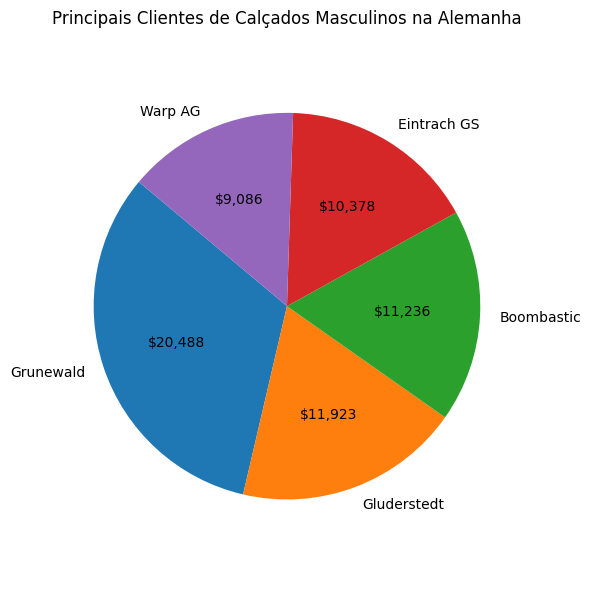

In [21]:
#9. Quais são os principais clientes (vendas $) do segmento “Calçados Masculinos” (Men ́s Footwear) na Alemanha?

germanSales = planilha_total[planilha_total['ClientePaís'] == 'Germany']
germanSalesByCategory = germanSales[germanSales['CategoriaNome'] == 'Men´s Footwear'] 
germanSalesByCategory = germanSalesByCategory.groupby('ClienteNome')['Vendas'].sum()
topGermanCustomers = germanSalesByCategory.sort_values(ascending=False).head(5)
print(topGermanCustomers)

def absolute_value(val): 
    a = np.round(val/100.*topGermanCustomers.sum(), 0)
    return f'${a:,.0f}'

plt.figure(figsize=(6,6))

# plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct='%1.1f%%', startangle=140)
plt.pie(topGermanCustomers, labels=topGermanCustomers.index, autopct=absolute_value, startangle=140)

plt.axis('equal')
plt.title('Principais Clientes de Calçados Masculinos na Alemanha')
plt.tight_layout()
plt.show()

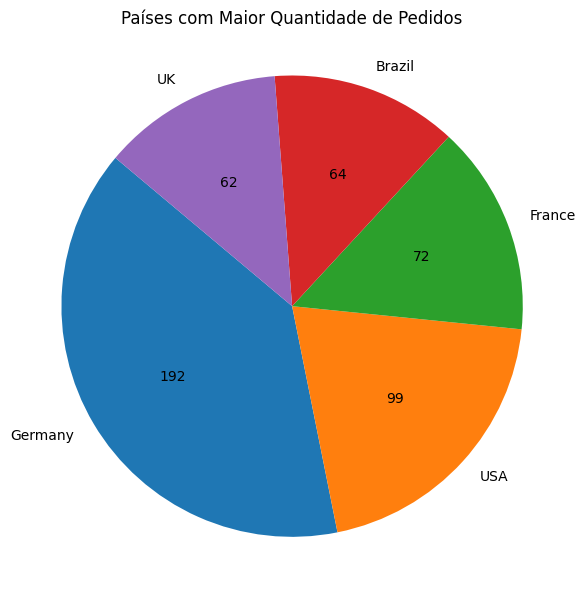

In [24]:
#10. Quais os países nos quais mais se tiram pedidos (qtde total de pedidos)?

totalOrdersByCountry = planilha_total.groupby('ClientePaís')['PedidoID'].nunique()
topCountriesByOrders = totalOrdersByCountry.sort_values(ascending=False).head(5)

def absolute_value(val): 
    a = np.round(val/100.*topCountriesByOrders.sum(), 0)
    return f'{a:,.0f}'

plt.figure(figsize=(6,6))

plt.pie(topCountriesByOrders, labels=topCountriesByOrders.index, autopct=absolute_value,startangle=140)

plt.axis('equal')
plt.title('Países com Maior Quantidade de Pedidos')
plt.tight_layout()
plt.show()
